# Hyperlink Model

## Data Pre-Processing

In [1]:
import pandas as pd
import logging
import threading
import concurrent.futures
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC

In [2]:
import re

In [3]:
raw_data = pd.read_csv('phish_score.csv')
raw_data.head()

,Date_Time,Score,URL,IP
0,2023-02-09 07:54:34,3.5,https://647cyu.z8.web.core.windows.net/,20.60.72.33
1,2023-02-09 07:54:31,2.2,https://30-02-9v-h38g5f-83gfd028egfd-2gfe0-g8w...,159.138.16.166
2,2023-02-09 07:54:29,2.2,https://22-02-0-fj39h5rg-38rgf-83gef-08cgw-eg0...,110.238.127.235
3,2023-02-09 07:54:26,4.1,https://22-02-0-3rg9hf-3r9fv-wrgvc-wd9jc-ge3r-...,159.138.80.33
4,2023-02-09 07:54:23,3.1,https://19-02-085-07945-963-740592-439u-t5tu.o...,159.138.16.166


In [4]:
copy_raw_data = raw_data
copy_raw_data.head()

,Date_Time,Score,URL,IP
0,2023-02-09 07:54:34,3.5,https://647cyu.z8.web.core.windows.net/,20.60.72.33
1,2023-02-09 07:54:31,2.2,https://30-02-9v-h38g5f-83gfd028egfd-2gfe0-g8w...,159.138.16.166
2,2023-02-09 07:54:29,2.2,https://22-02-0-fj39h5rg-38rgf-83gef-08cgw-eg0...,110.238.127.235
3,2023-02-09 07:54:26,4.1,https://22-02-0-3rg9hf-3r9fv-wrgvc-wd9jc-ge3r-...,159.138.80.33
4,2023-02-09 07:54:23,3.1,https://19-02-085-07945-963-740592-439u-t5tu.o...,159.138.16.166


In [5]:
copy_raw_data.shape

(37378, 4)

In [6]:
def url_len(row):
    return len(str(row['URL']))

copy_raw_data['Length'] = copy_raw_data.apply(lambda row: url_len(row),axis=1)
copy_raw_data.head()

,Date_Time,Score,URL,IP,Length
0,2023-02-09 07:54:34,3.5,https://647cyu.z8.web.core.windows.net/,20.60.72.33,39
1,2023-02-09 07:54:31,2.2,https://30-02-9v-h38g5f-83gfd028egfd-2gfe0-g8w...,159.138.16.166,228
2,2023-02-09 07:54:29,2.2,https://22-02-0-fj39h5rg-38rgf-83gef-08cgw-eg0...,110.238.127.235,229
3,2023-02-09 07:54:26,4.1,https://22-02-0-3rg9hf-3r9fv-wrgvc-wd9jc-ge3r-...,159.138.80.33,227
4,2023-02-09 07:54:23,3.1,https://19-02-085-07945-963-740592-439u-t5tu.o...,159.138.16.166,232


In [7]:
def url_digits(row):
    digits = re.findall('\d',row['URL'])
    return len(digits)
copy_raw_data['digits'] = copy_raw_data.apply(lambda row: url_digits(row),axis=1)
copy_raw_data.head()

,Date_Time,Score,URL,IP,Length,digits
0,2023-02-09 07:54:34,3.5,https://647cyu.z8.web.core.windows.net/,20.60.72.33,39,4
1,2023-02-09 07:54:31,2.2,https://30-02-9v-h38g5f-83gfd028egfd-2gfe0-g8w...,159.138.16.166,228,42
2,2023-02-09 07:54:29,2.2,https://22-02-0-fj39h5rg-38rgf-83gef-08cgw-eg0...,110.238.127.235,229,42
3,2023-02-09 07:54:26,4.1,https://22-02-0-3rg9hf-3r9fv-wrgvc-wd9jc-ge3r-...,159.138.80.33,227,41
4,2023-02-09 07:54:23,3.1,https://19-02-085-07945-963-740592-439u-t5tu.o...,159.138.16.166,232,56


In [8]:
copy_raw_data['digit_ratio'] = copy_raw_data['digits'] / copy_raw_data['Length']
copy_raw_data.head()

,Date_Time,Score,URL,IP,Length,digits,digit_ratio
0,2023-02-09 07:54:34,3.5,https://647cyu.z8.web.core.windows.net/,20.60.72.33,39,4,0.102564
1,2023-02-09 07:54:31,2.2,https://30-02-9v-h38g5f-83gfd028egfd-2gfe0-g8w...,159.138.16.166,228,42,0.184211
2,2023-02-09 07:54:29,2.2,https://22-02-0-fj39h5rg-38rgf-83gef-08cgw-eg0...,110.238.127.235,229,42,0.183406
3,2023-02-09 07:54:26,4.1,https://22-02-0-3rg9hf-3r9fv-wrgvc-wd9jc-ge3r-...,159.138.80.33,227,41,0.180617
4,2023-02-09 07:54:23,3.1,https://19-02-085-07945-963-740592-439u-t5tu.o...,159.138.16.166,232,56,0.241379


In [9]:
import urllib.request
from bs4 import BeautifulSoup, SoupStrainer
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
copy_raw_data.drop(6336, inplace=True)

In [10]:
#copy_raw_data.to_csv('pre_thread_db.csv')

In [11]:
def get_links(row):
    try:
        url2 = urllib.request.urlopen(str(row['URL']),timeout=15)
        print("Webpage opened")
    except:
        print('Webpage not responding')

        return None
    try:
        soup = BeautifulSoup(url2, 'lxml')
    except:
        print('Cant soup this')
        return None
    links = []
    link_len = 0
    if soup.find('a', {"href":"https://my.virginmedia.com/my-apps/onlinesecurity/websafe/settings"}):
        print("Blocked by virgin (fuck virgin fr)")
        return None
    for link in soup.findAll('a',href=True,limit=25):
        if link.get('href') == '#':
            continue
        links.append(link.get('href'))
        print('Link # ', link)
    print("Link Length: " ,len(links))
    link_len = int(len(links))
    return link_len

In [12]:
def get_sus_words(row):
    try:
        url2 = urllib.request.urlopen(str(row['URL']),timeout=15)
        print("Webpage opened")
    except:
        print('Webpage not responding')

        return None
    try:
        soup = BeautifulSoup(url2, 'lxml')
    except:
        print('Cant soup this')
        return None
    links = []
    link_len = 0
    if soup.find('a', {"href":"https://my.virginmedia.com/my-apps/onlinesecurity/websafe/settings"}):
        print("Blocked by virgin (fuck virgin fr)")
        return None
    for link in soup.findAll('p',string=re.compile(r'(security|login|signin|bank|account|update|include|webs|online)'),limit=150):
        links.append(link)
        print('Sus Word in <P> element # ', link)
    print("Sus Word Amount: " ,len(links))
    link_len = int(len(links))
    return link_len

In [13]:
def get_hyphens(row):
    hyphens = re.findall('-',row['URL'])
    return len(hyphens)

In [14]:
df_hyper = copy_raw_data[16001:20000]
df_hyper.shape

(3999, 7)

In [15]:
def hyperlink_df_transform():
        hyperlinks = []
        for index, row in df_hyper.iterrows():
                print("Transforming row: ", index)
                hyp_len = get_links(row)
                hyperlinks.append(hyp_len)
        return hyperlinks

Transforming row:  16002
Webpage not responding
Transforming row:  16003
Webpage not responding
Transforming row:  16004
Webpage not responding
Transforming row:  16005
Webpage opened
Link #  <a href="https://tinyurl.com">https://tinyurl.com</a>
Link Length:  1
Transforming row:  16006
Webpage not responding
Transforming row:  16007
Webpage not responding
Transforming row:  16008
Webpage not responding
Transforming row:  16009
Webpage not responding
Transforming row:  16010
Webpage not responding
Transforming row:  16011
Webpage not responding
Transforming row:  16012
Webpage not responding
Transforming row:  16013
Webpage not responding
Transforming row:  16014
Webpage not responding
Transforming row:  16015
Webpage not responding
Transforming row:  16016
Webpage not responding
Transforming row:  16017
Webpage not responding
Transforming row:  16018
Webpage not responding
Transforming row:  16019
Webpage not responding
Transforming row:  16020
Webpage not responding
Transforming row: 
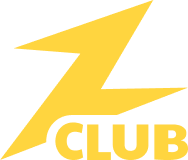
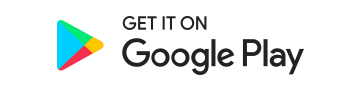
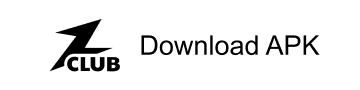
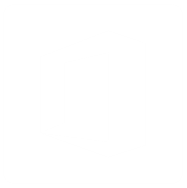
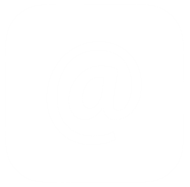

In [16]:
#df_hyper.drop([9289,11142,11141,11140,11143],inplace=True)
hyperlink_array = hyperlink_df_transform()
#df_hyper.to_csv('post_hyperlink_df.csv')


In [17]:
df_hyper['Hyperlinks'] = hyperlink_array
#df_hyper.tail()

f:\applications\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_hyper_clean = df_hyper.dropna()
df_hyper_clean.shape

(570, 8)

In [19]:
df_hyper_clean.to_csv('df_hyperlinks_clean_1_2.csv')

In [20]:
def sus_df_transform(sus):
        for index, row in df_hyper_clean.iterrows():
                print("Transforming row: ", index)
                sus_len = get_sus_words(row)
                sus.append(sus_len)
        return sus

In [ ]:
df_hyper_clean.drop(383,inplace=True)

In [21]:
arr = []
sus_word_len_array = sus_df_transform(arr)
len(sus_word_len_array)

Transforming row:  16005
Webpage opened
Sus Word in <P> element #  <p>
                    The TinyURL (5n8tbrdd) you visited was used by its creator in violation of our terms of use.
                    TinyURL has a strict no abuse policy and we apologize for the intrusion this user has caused you.
                    Such violations of our terms of use include:
                </p>
Sus Word Amount:  1
Transforming row:  16028
Webpage opened
Sus Word Amount:  0
Transforming row:  16032
Webpage opened
Sus Word Amount:  0
Transforming row:  16083
Webpage opened
Sus Word Amount:  0
Transforming row:  16084
Webpage opened
Sus Word Amount:  0
Transforming row:  16085
Webpage opened
Sus Word Amount:  0
Transforming row:  16086
Webpage opened
Sus Word Amount:  0
Transforming row:  16087
Webpage opened
Sus Word Amount:  0
Transforming row:  16102
Webpage opened
Sus Word in <P> element #  <p class="alert-text">Please confirm you are not a Robot by verifying the auto-generated code below, This

570

In [22]:
df_hyper_clean['Sus_Words'] = sus_word_len_array
df_hyper_clean.head()

f:\applications\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date_Time,Score,URL,IP,Length,digits,digit_ratio,Hyperlinks,Sus_Words
16005,2023-01-26 13:45:49,2.2,https://tinyurl.com/5n8tbrdd,172.67.1.225,28,2,0.071429,1.0,1.0
16028,2023-01-26 13:43:34,2.3,https://attupdatein.boxmode.io/,209.192.137.208,31,0,0.000000,6.0,0.0
16032,2023-01-26 13:43:28,5.1,http://revisioneportalebper.com/,81.88.53.74,32,0,0.000000,7.0,0.0
16083,2023-01-26 09:25:44,5.0,http://www.yyfoot-spa.com/rev/MyGov/personal.html,23.111.140.130,49,0,0.000000,1.0,0.0
16084,2023-01-26 09:25:43,5.5,http://www.yyfoot-spa.com/rev/MyGov/otp.html,23.111.140.130,44,0,0.000000,1.0,0.0


In [23]:
df_sus_clean = df_hyper_clean.dropna()
df_sus_clean.shape

(552, 9)

In [24]:
df_sus_clean.to_csv('df_sus_words_clean_1_2.csv')

In [ ]:
df_hyper_clean.to_excel('df_hyperlinks_clean.xlsx',sheet_name='Sheet2')

f:\applications\Anaconda\lib\site-packages\xlsxwriter\worksheet.py:1172: UserWarning: Ignoring URL 'https://inspirationalatmospheres.com/qxzrrr%20rrqw%20xzaq%20eew/4r3e7%20g6y5%2065yf%2065f%2045ft%207ugy%20456%205y7ug5%204ft%20457ug5%2045ft45t%2056g564%207hu6y6%205ft4t/6y5%207ug6y%207u5g%2056u7%20g5y4f%2056gu67%20u78hu7%2065yf65%20768hu%206gy5%2045ft56yg76%2023e%20yguh%2076ug6y%203d4rs3%2056g897i%205dr34%2023s34dt54/gy56t%2065ug%206g65%2045f%206uh8%206yg5%204f%2056gu6%2045ft%204t3s%2034t4%20y76uh78u%205f4tf6u6%20fd5t%204y56f34dr%203y57%20uhu86%204f5td%20t56u67/hu67yg%2065gy67%2045ft%2065gg67gu%2056%20u67%2045ftd%2056gu6%20i78hu6%2045ft4%205y67gu%20453%204rd3%2045y57u%20h8u%20y4ytd3r%2034t45t/ug65y_45y=u-gy5f64td545.y5-u6=7-gu5y6_46u=6-6uy5.23es34-t6=6h-ug6_7=8-g6u75fy6d45.yd5f-gu=8-ih6u5_w4=5fy-u5yts35.y57-u8=6-u7y56_46=u8-gu67fy56.23es-34dtf=56u-87giu_8i=89-i786u7565.r3-r=34t-46gu_68ih8u67/yg65ft.34dtf46-u=67u-g67y5_45yg=57-gu65f6dt.5sy-5u=68-gu7y5_45=y-7gu67fy563.s5t-5u=68-u7_45yg=57

In [ ]:
df_hyper_clean.iloc[831]

Unnamed: 0                                                  3892
Date_Time                                    2023-02-06 11:01:37
Score                                                        5.1
URL            http://bafybeiak7ts76m4wplzx6dsb4qptzebogvy6gv...
IP                                                2602:fea2:2::1
Length                                                        82
digits                                                        11
digit_ratio                                             0.134146
Hyperlinks                                                  11.0
Sus_Words                                                    NaN
Name: 832, dtype: object

In [ ]:
df_sus_clean.to_csv('df_sus_words_clean.csv')